<a href="https://colab.research.google.com/github/Phunbie/assignments/blob/main/Copy_of_homework_4_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 4

Use this notebook as a starter

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Data:

- https://github.com/gastonstat/CreditScoring
- Also available [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv)

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv

--2021-10-02 08:52:32--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘CreditScoring.csv.5’

CreditScoring.csv.5 100%[===================>] 178.21K  --.-KB/s    in 0.009s  

2021-10-02 08:52:33 (18.7 MB/s) - ‘CreditScoring.csv.5’ saved [182489/182489]



## Preparation 

We'll talk about this dataset in more details in week 6. But for now, use the following code to get started

In [ ]:
df = pd.read_csv('CreditScoring.csv')
df.columns = df.columns.str.lower()

Some of the features are encoded as numbers. Use the following code to de-code them:

In [ ]:
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}

df.status = df.status.map(status_values)


home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

Prepare the numerical variables:

In [ ]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=0)

Remove clients with unknown default status

In [ ]:
df = df[df.status != 'unk'].reset_index(drop=True)

Create the target variable

In [ ]:
df['default'] = (df.status == 'default').astype(int)
del df['status']

In [ ]:
df['default']

0       0
1       0
2       1
3       0
4       0
       ..
4449    1
4450    0
4451    1
4452    0
4453    0
Name: default, Length: 4454, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seniority  4454 non-null   int64 
 1   home       4454 non-null   object
 2   time       4454 non-null   int64 
 3   age        4454 non-null   int64 
 4   marital    4454 non-null   object
 5   records    4454 non-null   object
 6   job        4454 non-null   object
 7   expenses   4454 non-null   int64 
 8   income     4454 non-null   int64 
 9   assets     4454 non-null   int64 
 10  debt       4454 non-null   int64 
 11  amount     4454 non-null   int64 
 12  price      4454 non-null   int64 
 13  default    4454 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 487.3+ KB


## Your code

What are the categorical variables? What are the numerical?

In [ ]:
cat = list(df.dtypes[df.dtypes == 'object'].index)
numerical= ['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price']
target_col = 'default'
print('categorical columns : ',cat)
print('numerical column : ',numerical)


categorical columns :  ['home', 'marital', 'records', 'job']
numerical column :  ['seniority', 'time', 'age', 'expenses', 'income', 'assets', 'debt', 'amount', 'price']


In [ ]:
X = df[cat+numerical]
y = df.default
print(X.columns)
print(y.shape)
print(X.shape)

Index(['home', 'marital', 'records', 'job', 'seniority', 'time', 'age',
       'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')
(4454,)
(4454, 13)


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` funciton for that with `random_state=1`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=1)

In [ ]:
y_val.shape

(891,)

## Question 1

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score and compute AUC with the default variable
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenses']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(y,-df.seniority)

0.696664548444976

In [ ]:
roc_auc_score(y, df.time)

0.5536379834529507

In [ ]:
roc_auc_score(y, -df.income)

0.6673970793460926

In [ ]:
roc_auc_score(y, -df.debt)

0.5073083632376394

Which numerical variable (among the following 4) has the highest AUC?

- seniority
- time
- income
- debt

## Training the model

From now on, use these columns only:

```
['seniority', 'income', 'assets', 'records', 'job', 'home']
```

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

In [ ]:
selected = ['seniority', 'income', 'assets', 'records', 'job', 'home']

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
X_train_dict = X_train[selected].to_dict(orient='records') 
X_val_dict = X_val[selected].to_dict(orient='records')

In [ ]:
dv = DictVectorizer(sparse=False)
dv.fit(X_train_dict)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
               sparse=False)

In [ ]:
X_train1 = dv.transform(X_train_dict)

In [ ]:
X_train1.shape

(2672, 17)

In [ ]:
X_val1 = dv.transform(X_val_dict)

In [ ]:
X_val1.shape

(891, 17)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [ ]:
model.fit(X_train1,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_val_pred = model.predict_proba(X_val1) 
y_val1 =y_val_pred[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
round(roc_auc_score(y_val,y_val1),3)

0.812

## Question 2
**bold text**
What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.512
- 0.612
- 0.712
- 0.812

## Question 3

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

In [ ]:
thresholds = np.linspace(0, 1, 101)
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [ ]:
confus = []
for i in thresholds:
      tp = ((y_val1 >= i) & (y_val == 1)).sum()
      fp = ((y_val1 >= i) & (y_val == 0)).sum()
      fn = ((y_val1 < i) & (y_val == 1)).sum()
      tn = ((y_val1 < i) & (y_val == 0)).sum()
      confus.append((i,tp,fp,fn,tn)) 

In [ ]:
thre_pre_rec = pd.DataFrame(confus)
thre_pre_rec.columns = ['threshold','tp','fp','fn','tn']
thre_pre_rec

,threshold,tp,fp,fn,tn
0,0.00,246,645,0,0
1,0.01,246,635,0,10
2,0.02,244,613,2,32
3,0.03,242,593,4,52
4,0.04,242,563,4,82
...,...,...,...,...,...
96,0.96,0,0,246,645
97,0.97,0,0,246,645
98,0.98,0,0,246,645
99,0.99,0,0,246,645


In [ ]:
thre_pre_rec['precision'] = thre_pre_rec['tp'] / (thre_pre_rec['tp'] + thre_pre_rec['fp'])
thre_pre_rec['recall'] = thre_pre_rec['tp'] / (thre_pre_rec['tp'] + thre_pre_rec['fn'])
thre_pre_rec

,threshold,tp,fp,fn,tn,precision,recall
0,0.00,246,645,0,0,0.276094,1.00000
1,0.01,246,635,0,10,0.279228,1.00000
2,0.02,244,613,2,32,0.284714,0.99187
3,0.03,242,593,4,52,0.289820,0.98374
4,0.04,242,563,4,82,0.300621,0.98374
...,...,...,...,...,...,...,...
96,0.96,0,0,246,645,NaN,0.00000
97,0.97,0,0,246,645,NaN,0.00000
98,0.98,0,0,246,645,NaN,0.00000
99,0.99,0,0,246,645,NaN,0.00000


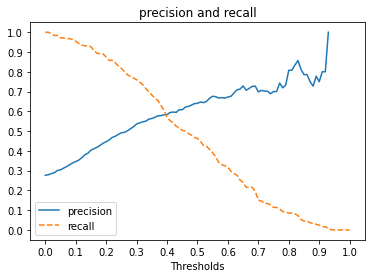

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(thre_pre_rec.threshold, thre_pre_rec.precision, linestyle='solid', label='precision')
plt.plot(thre_pre_rec.threshold, thre_pre_rec.recall, linestyle='dashed', label='recall')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('precision and recall')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

At which threshold precision and recall curves intersect?

* 0.2
* 0.4
* 0.6
* 0.8

## Question 4

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

In [ ]:
thre_pre_rec['F1']= 2*((thre_pre_rec['precision']*thre_pre_rec['recall'])/(thre_pre_rec['precision']+thre_pre_rec['recall']))
thre_pre_rec

,threshold,tp,fp,fn,tn,precision,recall,F1
0,0.00,246,645,0,0,0.276094,1.00000,0.432718
1,0.01,246,635,0,10,0.279228,1.00000,0.436557
2,0.02,244,613,2,32,0.284714,0.99187,0.442430
3,0.03,242,593,4,52,0.289820,0.98374,0.447734
4,0.04,242,563,4,82,0.300621,0.98374,0.460514
...,...,...,...,...,...,...,...,...
96,0.96,0,0,246,645,NaN,0.00000,NaN
97,0.97,0,0,246,645,NaN,0.00000,NaN
98,0.98,0,0,246,645,NaN,0.00000,NaN
99,0.99,0,0,246,645,NaN,0.00000,NaN


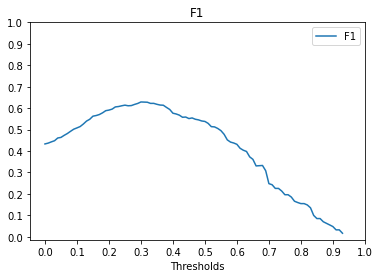

In [ ]:
plt.figure(figsize=(6, 4))

plt.plot(thre_pre_rec.threshold, thre_pre_rec.F1, linestyle='solid', label='F1')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('F1')

# plt.savefig('04_fpr_tpr_plot.svg')

plt.show()

At which threshold F1 is maximal?

- 0.1
- 0.3
- 0.5
- 0.7

## Question 5


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [ ]:
def train(df, y):
    cat = df[selected].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model2 = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X, y)

    return dv, model

def predict(df, dv, model):
    cat = df[selected].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [ ]:
aucs = []

for train_idx, val_idx in kfold.split(X_train_full):
    df_train = X_train_full.iloc[train_idx]
    y_train = y_train_full.iloc[train_idx].values

    df_val = X_train_full.iloc[val_idx]
    y_val = y_train_full.iloc[val_idx].values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [ ]:
aucs

[0.8256212256212256,
 0.8254077031563474,
 0.789298525308888,
 0.8153421373265731,
 0.8054696294614563]

In [ ]:
aucs = np.array(aucs)

In [ ]:
round(np.std(aucs),3)

0.014

How large is standard devidation of the scores across different folds?

- 0.001
- 0.014
- 0.09
- 0.14

## Question 6

Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: `[0.01, 0.1, 1, 10]`
* Use these parametes for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std

In [ ]:
C = [0.01, 0.1, 1, 10]
for i in C: 
      def train(df, y):
          cat = df[selected].to_dict(orient='records')
          
          dv = DictVectorizer(sparse=False)
          dv.fit(cat)

          X = dv.transform(cat)

          model2 = LogisticRegression(solver='liblinear', C=i, max_iter=1000)
          model2.fit(X, y)

          return dv, model2
      def predict(df, dv, model2):
          cat = df[selected].to_dict(orient='records')
          
          X = dv.transform(cat)

          y_pred = model.predict_proba(X)[:, 1]

          return y_pred
      aucs = []

      for train_idx, val_idx in kfold.split(X_train_full):
          df_train = X_train_full.iloc[train_idx]
          y_train = y_train_full.iloc[train_idx].values

          df_val = X_train_full.iloc[val_idx]
          y_val = y_train_full.iloc[val_idx].values

          dv, model = train(df_train, y_train)
          y_pred = predict(df_val, dv, model)

          rocauc = roc_auc_score(y_val, y_pred)
          aucs.append(rocauc)
      aucs = np.array(aucs)
      stdd = np.std(aucs)
      meann = np.mean(aucs)
      print(str(i),':','mean_auc = {} standard daviation is {}'.format(meann,stdd))



0.01 : mean_auc = 0.8076876665463588 standard daviation is 0.011832148394108436
0.1 : mean_auc = 0.8129017360952779 standard daviation is 0.013740829347711075
1 : mean_auc = 0.812227844174898 standard daviation is 0.013669069470482898
10 : mean_auc = 0.8141433397756099 standard daviation is 0.014614166612648758


Which C leads to the best mean score?

- 0.01
- 0.1
- 1
- 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C

## Submit the results

Submit your results here: https://forms.gle/e497sR5iB36mM9Cs5

It's possible that your answers won't match exactly. If it's the case, select the closest one.

## Deadline

The deadline for submitting is 04 October 2021, 17:00 CET. After that, the form will be closed.